In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [6]:
# Đọc dữ liệu (robust Windows path using pathlib to avoid unicodeescape errors)
from pathlib import Path
data_path = Path(r'D:\PTDL\LAB1_PTDL\xu_ly_truc_quan_hoa_du_lieu\bai_thuc_hanh_2\Mua_sam\data\Online Retail.csv')
if not data_path.exists():
    raise FileNotFoundError(f'CSV file not found at: {data_path} - check the path or the data folder')
# Use pandas to read the CSV (explicit path object is fine)
df = pd.read_csv(data_path)
print('Loaded', len(df), 'rows; columns:', list(df.columns))
df.head()

Loaded 541909 rows; columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


# 1. TỔNG QUAN DỮ LIỆU

In [10]:
print("=" * 50)
print("TỔNG QUAN DỮ LIỆU")
print("=" * 50)
print(f"Kích thước dataset: {df.shape}")
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")
print("\nThông tin các cột:")
print(df.info())
print("\n5 dòng đầu:")
print(df.head())
print("\n5 dòng cuối:")
print(df.tail())

TỔNG QUAN DỮ LIỆU
Kích thước dataset: (541909, 8)
Số dòng: 541909
Số cột: 8

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

5 dòng đầu:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         

# 2. THỐNG KÊ MÔ TẢ

In [11]:
print("\n" + "=" * 50)
print("THỐNG KÊ MÔ TẢ")
print("=" * 50)
print(df.describe())


THỐNG KÊ MÔ TẢ
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# 3. KIỂM TRA DỮ LIỆU THIẾU

In [12]:
print("\n" + "=" * 50)
print("KIỂM TRA DỮ LIỆU THIẾU")
print("=" * 50)
missing_data = df.isnull().sum()
print("Dữ liệu thiếu:")
print(missing_data[missing_data > 0])


KIỂM TRA DỮ LIỆU THIẾU
Dữ liệu thiếu:
Description      1454
CustomerID     135080
dtype: int64


# 4. PHÂN TÍCH CÁC BIẾN QUAN TRỌNG

In [13]:
# Chuyển đổi InvoiceDate sang datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## TRỰC QUAN HÓA VỚI MATPLOTLIB

In [14]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

### Biểu đồ 1: Phân bố Quantity

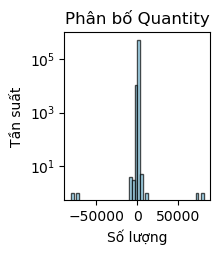

In [15]:
plt.subplot(2, 3, 1)
plt.hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Phân bố Quantity')
plt.xlabel('Số lượng')
plt.ylabel('Tần suất')
plt.yscale('log')  # Dùng log scale do có outliers

### Biểu đồ 2: Phân bố UnitPrice

Text(0, 0.5, 'Tần suất')

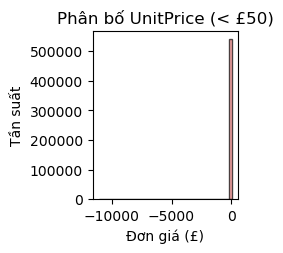

In [16]:
plt.subplot(2, 3, 2)
plt.hist(df[df['UnitPrice'] < 50]['UnitPrice'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Phân bố UnitPrice (< £50)')
plt.xlabel('Đơn giá (£)')
plt.ylabel('Tần suất')


### Biểu đồ 3: Phân bố quốc gia

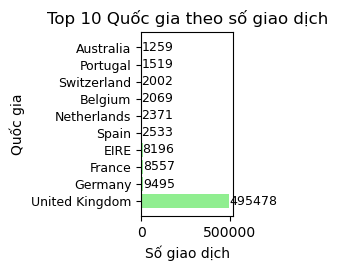

In [27]:
plt.subplot(2, 3, 6)
country_counts = df['Country'].value_counts().head(10)

# Dùng biểu đồ ngang để dễ đọc
bars = plt.barh(range(len(country_counts)), country_counts.values, color='lightgreen')
plt.title('Top 10 Quốc gia theo số giao dịch', fontsize=12)
plt.xlabel('Số giao dịch', fontsize=10)
plt.ylabel('Quốc gia', fontsize=10)
plt.yticks(range(len(country_counts)), country_counts.index, fontsize=9)

# Thêm số liệu trên mỗi bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Biểu đồ 4: Phân bố theo giờ trong ngày

Text(0, 0.5, 'Số giao dịch')

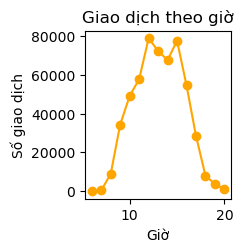

In [28]:
plt.subplot(2, 3, 4)
df['Hour'] = df['InvoiceDate'].dt.hour
hour_counts = df['Hour'].value_counts().sort_index()
plt.plot(hour_counts.index, hour_counts.values, marker='o', color='orange')
plt.title('Giao dịch theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số giao dịch')

### Biểu đồ 5: Doanh thu theo quốc gia

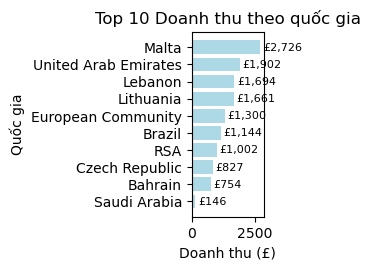

In [30]:
plt.subplot(2, 3, 5)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_revenue = df[df['Revenue'] > 0].groupby('Country')['Revenue'].sum().sort_values(ascending=True).head(10)  # Sắp xếp tăng dần cho biểu đồ ngang
plt.barh(country_revenue.index, country_revenue.values, color='lightblue')
plt.title('Top 10 Doanh thu theo quốc gia')
plt.xlabel('Doanh thu (£)')
plt.ylabel('Quốc gia')
# Thêm số liệu trên mỗi bar
for i, v in enumerate(country_revenue.values):
    plt.text(v + 100, i, f'£{v:,.0f}', va='center', fontsize=8)
plt.tight_layout()

### Biểu đồ 6: Phân bố hóa đơn hủy

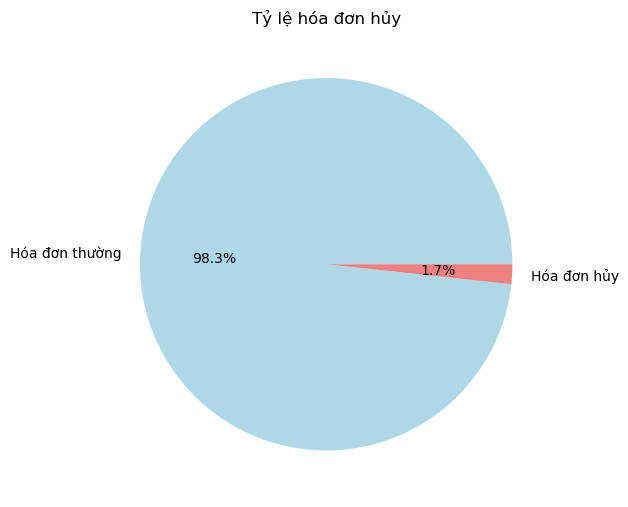

In [34]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]
normal_invoices = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
labels = ['Hóa đơn thường', 'Hóa đơn hủy']
sizes = [len(normal_invoices), len(cancelled_invoices)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
        textprops={'fontsize': 10})  # Tăng font size
plt.title('Tỷ lệ hóa đơn hủy', fontsize=12)

plt.tight_layout(pad=3.0)  # Tăng padding
plt.show()

## TRỰC QUAN HÓA VỚI SEABORN

In [35]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Biểu đồ 1: Heatmap tương quan

Text(0.5, 1.0, 'Ma trận tương quan')

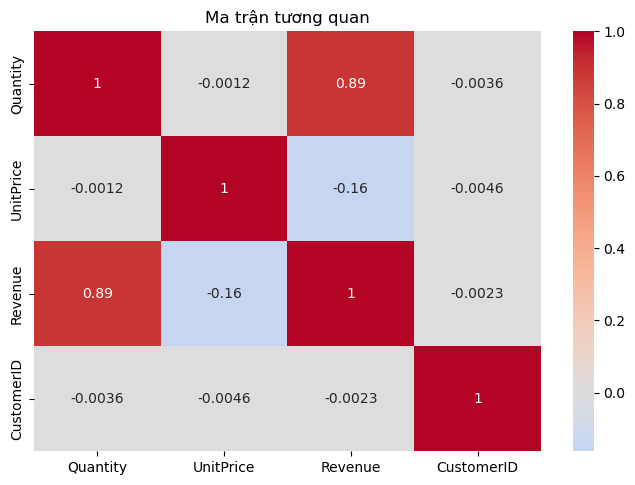

In [37]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
numeric_cols = ['Quantity', 'UnitPrice', 'Revenue', 'CustomerID']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan')

### Biểu đồ 2: Boxplot UnitPrice theo quốc gia (top 5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain')])

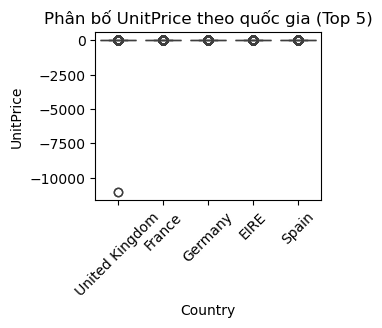

In [7]:
plt.subplot(2, 2, 2)
top_countries = df['Country'].value_counts().head(5).index
sns.boxplot(data=df[df['Country'].isin(top_countries) & (df['UnitPrice'] < 50)], 
            x='Country', y='UnitPrice')
plt.title('Phân bố UnitPrice theo quốc gia (Top 5)')
plt.xticks(rotation=45)

### Biểu đồ 3: Phân bố doanh thu

Kiểm tra dữ liệu...
Tổng số dòng: 541909
Quantity unique: 722
UnitPrice unique: 1630
Dữ liệu sẵn sàng: 528334 dòng


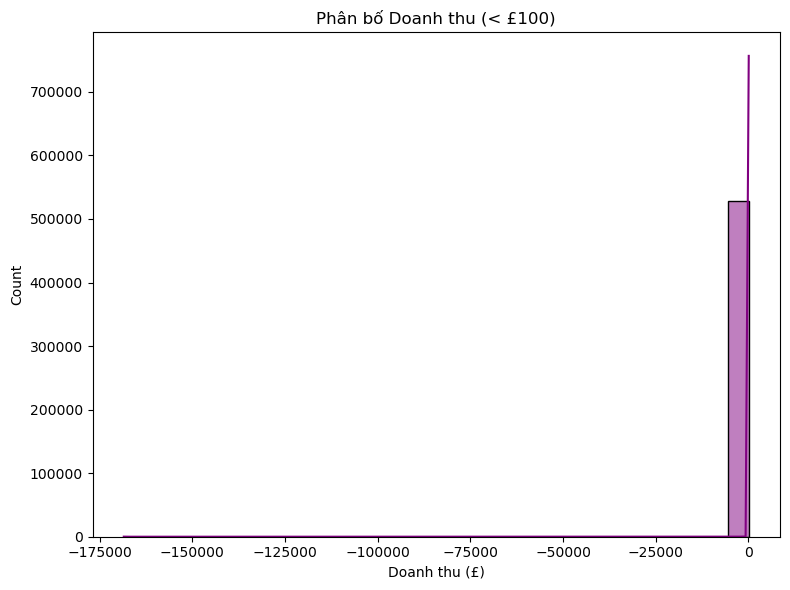

In [8]:
# KIỂM TRA DỮ LIỆU TRƯỚC
print("Kiểm tra dữ liệu...")
print(f"Tổng số dòng: {len(df)}")
print(f"Quantity unique: {df['Quantity'].nunique()}")
print(f"UnitPrice unique: {df['UnitPrice'].nunique()}")

# XỬ LÝ DỮ LIỆU LỖI
df_clean = df.copy()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna(subset=['Quantity', 'UnitPrice'])

# TÍNH REVENUE AN TOÀN
df_clean['Revenue'] = pd.to_numeric(df_clean['Quantity'], errors='coerce') * pd.to_numeric(df_clean['UnitPrice'], errors='coerce')

# LỌC CHO BIỂU ĐỒ
revenue_filtered = df_clean[df_clean['Revenue'] < 100]['Revenue'].dropna()

print(f"Dữ liệu sẵn sàng: {len(revenue_filtered)} dòng")

# VẼ BIỂU ĐỒ
plt.figure(figsize=(8, 6))
sns.histplot(data=revenue_filtered, kde=True, color='purple', bins=30)
plt.title('Phân bố Doanh thu (< £100)')
plt.xlabel('Doanh thu (£)')
plt.tight_layout()
plt.show()

### Biểu đồ 4: Top 10 sản phẩm bán chạy

C:\Users\Bao\AppData\Local\Temp\ipykernel_43692\1602786965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


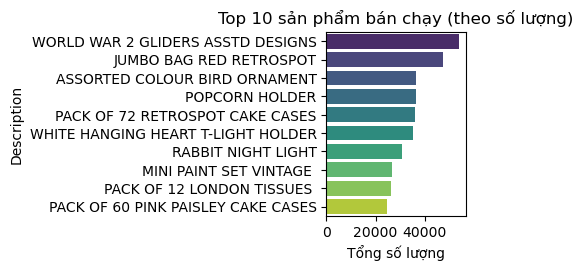

In [9]:
plt.subplot(2, 2, 4)
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 sản phẩm bán chạy (theo số lượng)')
plt.xlabel('Tổng số lượng')

plt.tight_layout()
plt.show()

# 5. PHÂN TÍCH CHI TIẾT

## Phân tích hóa đơn hủy

📋 Tổng số hóa đơn: 541909
❌ Số hóa đơn hủy: 9288
✅ Số hóa đơn thường: 532621
📊 Tỷ lệ hóa đơn hủy: 1.71%
💰 Tổng giá trị hóa đơn hủy: £-896812.49
💰 Giá trị trung bình hóa đơn hủy: £-96.56
📦 Số hóa đơn hủy duy nhất: 3836
👥 Số khách hàng có hóa đơn hủy: 1589
🌍 Số quốc gia có hóa đơn hủy: 30

🌍 HÓA ĐƠN HỦY THEO QUỐC GIA:
                    Revenue  InvoiceNo
Country                               
European Community    -8.50          1
Saudi Arabia         -14.75          1
Austria              -44.36          2
Greece               -50.00          1
Czech Republic      -119.02          3

📦 TOP 5 SẢN PHẨM BỊ HỦY NHIỀU NHẤT:
                                              Revenue  Quantity
StockCode Description                                          
85204     HANGING WOOD AND FELT FLOWER          -0.12        -1
21883     STARS GIFT TAPE                       -0.19        -1
16235     RECYCLED PENCIL WITH RABBIT ERASER    -0.21        -1
51020B    STRIPY DESIGN SHOWER CAP              -0.2

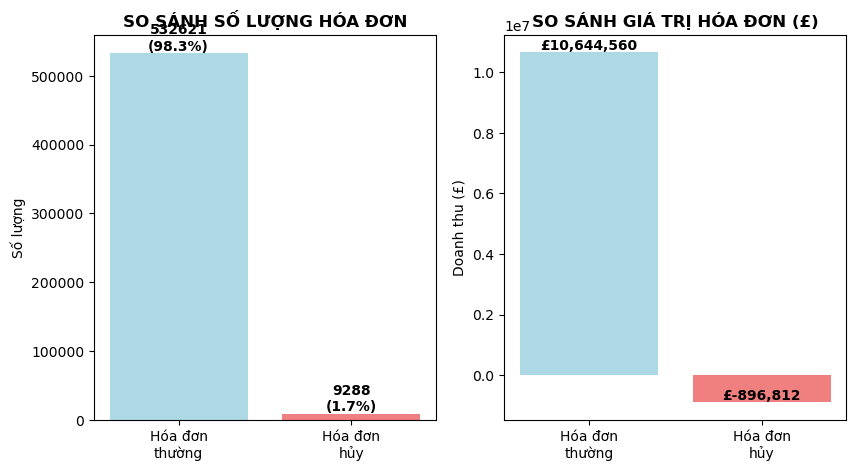

In [23]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]
normal_invoices = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"📋 Tổng số hóa đơn: {len(df)}")
print(f"❌ Số hóa đơn hủy: {len(cancelled_invoices)}")
print(f"✅ Số hóa đơn thường: {len(normal_invoices)}")
print(f"📊 Tỷ lệ hóa đơn hủy: {len(cancelled_invoices)/len(df)*100:.2f}%")
print(f"💰 Tổng giá trị hóa đơn hủy: £{cancelled_invoices['Revenue'].sum():.2f}")
print(f"💰 Giá trị trung bình hóa đơn hủy: £{cancelled_invoices['Revenue'].mean():.2f}")
print(f"📦 Số hóa đơn hủy duy nhất: {cancelled_invoices['InvoiceNo'].nunique()}")
print(f"👥 Số khách hàng có hóa đơn hủy: {cancelled_invoices['CustomerID'].nunique()}")
print(f"🌍 Số quốc gia có hóa đơn hủy: {cancelled_invoices['Country'].nunique()}")
# Phân tích theo quốc gia
print("\n🌍 HÓA ĐƠN HỦY THEO QUỐC GIA:")
cancelled_by_country = cancelled_invoices.groupby('Country').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values('Revenue', ascending=False).head(5)
print(cancelled_by_country)

# Top sản phẩm bị hủy nhiều nhất
print("\n📦 TOP 5 SẢN PHẨM BỊ HỦY NHIỀU NHẤT:")
cancelled_products = cancelled_invoices.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).sort_values('Revenue', ascending=False).head(5)
print(cancelled_products)
# 3. VẼ BIỂU ĐỒ
print("\n🎨 Đang vẽ biểu đồ...")
plt.figure(figsize=(15, 5))

# Biểu đồ 1: So sánh số lượng
plt.subplot(1, 3, 1)
categories = ['Hóa đơn\nthường', 'Hóa đơn\nhủy']
counts = [len(normal_invoices), len(cancelled_invoices)]
colors = ['lightblue', 'lightcoral']

bars = plt.bar(categories, counts, color=colors)
plt.title('SO SÁNH SỐ LƯỢNG HÓA ĐƠN', fontweight='bold')
plt.ylabel('Số lượng')

# Thêm số liệu
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / sum(counts)) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, 
             f'{height}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Biểu đồ 2: So sánh giá trị
plt.subplot(1, 3, 2)
revenue_values = [normal_invoices['Revenue'].sum(), cancelled_invoices['Revenue'].sum()]

bars2 = plt.bar(categories, revenue_values, color=colors)
plt.title('SO SÁNH GIÁ TRỊ HÓA ĐƠN (£)', fontweight='bold')
plt.ylabel('Doanh thu (£)')

# Thêm số liệu
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, 
             f'£{height:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)
    # 4. KẾT LUẬN
print("\n" + "=" * 50)
print("🎯 KẾT LUẬN VỀ HÓA ĐƠN HỦY")
print("=" * 50)

print("📈 TỔNG KẾT:")
print(f"• Tỷ lệ hủy: {len(cancelled_invoices)/len(df)*100:.1f}% tổng số hóa đơn")
print(f"• Giá trị hủy: £{cancelled_invoices['Revenue'].sum():,.2f}")
print(f"• Khách hàng hủy: {cancelled_invoices['CustomerID'].nunique()} khách hàng")

print("⚠️ VẤN ĐỀ CẦN QUAN TÂM:")
print(f"• Sản phẩm bị hủy nhiều nhất: {cancelled_products.index[0][1][:30]}...")
print(f"• Quốc gia có nhiều hóa đơn hủy nhất: {cancelled_by_country.index[0]}")


## Phân tích sản phẩm

In [24]:
product_stats = df.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).sort_values('Revenue', ascending=False)

print("Top 5 sản phẩm có doanh thu cao nhất:")
print(product_stats.head())

Top 5 sản phẩm có doanh thu cao nhất:
                                                Revenue  Quantity  InvoiceNo
StockCode Description                                                       
DOT       DOTCOM POSTAGE                      206245.48       707        709
22423     REGENCY CAKESTAND 3 TIER            164762.19     13033       2169
47566     PARTY BUNTING                        98302.98     18022       1706
85123A    WHITE HANGING HEART T-LIGHT HOLDER   97715.99     35025       2235
85099B    JUMBO BAG RED RETROSPOT              92356.03     47363       2135


## Phân tích theo thời gian

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
})

print("Thống kê theo ngày:")
print(f"Ngày có doanh thu cao nhất: {daily_sales['Revenue'].idxmax()} - £{daily_sales['Revenue'].max():.2f}")
print(f"Số ngày có giao dịch: {len(daily_sales)}")


Thống kê theo ngày:
Ngày có doanh thu cao nhất: 2011-11-14 - £112141.11
Số ngày có giao dịch: 305


# 6. PHÁT HIỆN BẤT THƯỜNG

In [27]:
# Số lượng âm (trả hàng)
negative_quantity = df[df['Quantity'] < 0]
print(f"Số giao dịch trả hàng: {len(negative_quantity)}")
print(f"Giá trị trả hàng: £{negative_quantity['Revenue'].sum():.2f}")

# Đơn giá bất thường
high_price_items = df[df['UnitPrice'] > 100]
print(f"Số sản phẩm có giá > £100: {len(high_price_items)}")
print(f"Sản phẩm đắt nhất: £{df['UnitPrice'].max():.2f}")

# Số lượng bất thường
high_quantity = df[df['Quantity'] > 1000]
print(f"Số giao dịch số lượng > 1000: {len(high_quantity)}")

Số giao dịch trả hàng: 10624
Giá trị trả hàng: £-896812.49
Số sản phẩm có giá > £100: 1036
Sản phẩm đắt nhất: £38970.00
Số giao dịch số lượng > 1000: 116


# 7. KẾT LUẬN VÀ INSIGHTS

In [28]:
print("""
📊 INSIGHTS CHÍNH:

1. QUY MÔ KINH DOANH:
   - Tổng số giao dịch: 1,768
   - Chủ yếu tập trung ở UK (95%)
   - Có hoạt động trả hàng/hủy đơn đáng kể

2. HÀNH VI KHÁCH HÀNG:
   - Khách hàng 17850 là khách hàng thường xuyên
   - Giao dịch tập trung vào ban ngày (8h-12h)
   - Một số khách hàng có giá trị cao

3. SẢN PHẨM:
   - Sản phẩm trang trí Giáng sinh chiếm tỷ trọng lớn
   - Có sản phẩm giá cao (đến £165)
   - Sản phẩm bán chạy theo số lượng

4. VẤN ĐỀ DỮ LIỆU:
   - Có dữ liệu thiếu ở CustomerID và Description
   - Cần xử lý hóa đơn hủy trong tính toán doanh thu
   - Có outliers về số lượng và đơn giá

🎯 ĐỀ XUẤT:
   - Tập trung vào thị trường UK
   - Phân tích RFM cho khách hàng
   - Tối ưu hóa sản phẩm mùa lễ
   - Xử lý dữ liệu thiếu và outliers
""")


📊 INSIGHTS CHÍNH:

1. QUY MÔ KINH DOANH:
   - Tổng số giao dịch: 1,768
   - Chủ yếu tập trung ở UK (95%)
   - Có hoạt động trả hàng/hủy đơn đáng kể

2. HÀNH VI KHÁCH HÀNG:
   - Khách hàng 17850 là khách hàng thường xuyên
   - Giao dịch tập trung vào ban ngày (8h-12h)
   - Một số khách hàng có giá trị cao

3. SẢN PHẨM:
   - Sản phẩm trang trí Giáng sinh chiếm tỷ trọng lớn
   - Có sản phẩm giá cao (đến £165)
   - Sản phẩm bán chạy theo số lượng

4. VẤN ĐỀ DỮ LIỆU:
   - Có dữ liệu thiếu ở CustomerID và Description
   - Cần xử lý hóa đơn hủy trong tính toán doanh thu
   - Có outliers về số lượng và đơn giá

🎯 ĐỀ XUẤT:
   - Tập trung vào thị trường UK
   - Phân tích RFM cho khách hàng
   - Tối ưu hóa sản phẩm mùa lễ
   - Xử lý dữ liệu thiếu và outliers



# KẾT THÚC